In [134]:
#Import packages
import pickle
import re
import string
import unicodedata
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**DATASET**

In [135]:
#Load Dataset
df = pd.read_csv('/content/dataset_1.txt')
df.head()

,lyrics,name
0,মোমের পুতুল মমীর দেশের মেয়ে নেচে যায় বিহবল চ...,1.0
1,লাল টুকটুকে বৌ যায় গো লাল ন টের ক্ষেতে যে তার ...,1.0
2,অরুণকান্তি কে গো যোগী ভিখারী নীরবে হেসে দাঁড়াই...,1.0
3,দ্বীপ নিভিয়াছে ঝড়ে জেগে আছে মোর আঁখি কে যেন কহ...,1.0
4,তোমারি আঁখির মত আকাশের দুটি তারা চেয়ে থাকে মোর...,1.0


**SPLI**T **DATASET**

In [136]:
#Split Dataset into Train and Test
x = df.loc[:, 'lyrics'].values
y = df.loc[:, 'name'].values
print(x.shape)
print(y.shape)

(359,)
(359,)


**DATASET preprocessing**

In [137]:
#Feature Extraction using Tf-Idf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
print(X.shape)
#print(Y_train.shape, Y_test.shape)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(y)
#Y=y
print(Y.shape)
print(Y)

(359, 1345)
(359,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9  9  9  9  9  9  

**TRAIN TEST SPLIT METHOD**

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(287, 1345) (72, 1345)
(287,) (72,)


**Naive Bayes Algorithm**

Train Accuracy ::  0.6341463414634146
Test Accuracy  ::  0.3472222222222222
[[7 2 3 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0]
 [0 7 6 0 0 0 0 0 0 0 0]
 [0 4 0 5 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0]
 [1 2 1 0 0 0 0 0 1 0 0]
 [0 2 0 1 0 0 0 0 0 0 0]
 [1 3 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0]
 [1 5 1 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.16      1.00      0.28         7
           2       0.50      0.46      0.48        13
           3       0.83      0.56      0.67         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         7

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


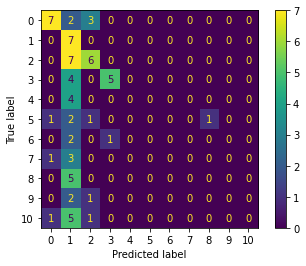

In [139]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
model = MultinomialNB().fit(X_train, Y_train)
# Predict Output 
NBpred = model.predict(X_test)
print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, NBpred))
cm1=confusion_matrix(Y_test, NBpred)
print(confusion_matrix(Y_test, NBpred))
print(classification_report(Y_test, NBpred))
#SVC(random_state=0)
plot_confusion_matrix(model, X_test, Y_test)  # doctest: +SKIP
plt.show()

**K-FOLD (K=10)**

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
scores = cross_val_score(clf, X, Y, cv=10) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.41666667 0.30555556 0.41666667 0.44444444 0.30555556 0.36111111
 0.30555556 0.38888889 0.41666667 0.37142857]
Accuracy: 0.37 (+/- 0.10)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


**K-FOLD (K=5)**

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
scores = cross_val_score(clf, X, Y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.33333333 0.44444444 0.30555556 0.31944444 0.35211268]
Accuracy: 0.35 (+/- 0.10)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


**JACKKNIFE for NB**

In [133]:
from sklearn import naive_bayes
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv = model_selection.LeaveOneOut()
clf = naive_bayes.MultinomialNB()
results_loocv = model_selection.cross_val_score(clf, X, Y, cv=loocv)
#print(results_loocv)
results_loocv.shape
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 35.65%


**Decision Tree Algorithm**

Train Accuracy ::  1.0
Test Accuracy  ::  0.2916666666666667
[[4 1 2 1 2 0 0 0 0 1 1]
 [2 0 1 0 0 1 0 2 0 0 1]
 [3 2 3 1 1 0 0 0 3 0 0]
 [1 0 0 7 0 0 0 0 0 1 0]
 [1 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 1 1 0 1 0]
 [0 1 2 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 1 1 0 0 0]
 [1 0 2 0 2 0 0 1 0 0 1]]
              precision    recall  f1-score   support

           0       0.31      0.33      0.32        12
           1       0.00      0.00      0.00         7
           2       0.25      0.23      0.24        13
           3       0.78      0.78      0.78         9
           4       0.14      0.25      0.18         4
           5       0.60      0.60      0.60         5
           6       0.00      0.00      0.00         3
           7       0.20      0.25      0.22         4
           8       0.25      0.20      0.22         5
           9       0.00      0.00      0.00         3
          10       0.25      0.14      0.18         7

    accuracy 

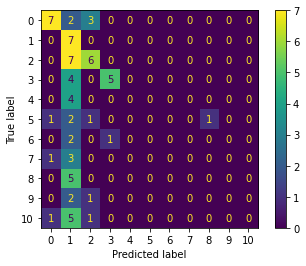

In [141]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Train Accuracy :: ", accuracy_score(Y_train,classifier.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Y_pred))
cm1=confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(model, X_test, Y_test)  # doctest: +SKIP
plt.show()

**K-FOLD**

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=10) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.30555556 0.38888889 0.36111111 0.19444444 0.33333333 0.30555556
 0.38888889 0.27777778 0.22222222 0.37142857]
Accuracy: 0.31 (+/- 0.13)


In [143]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.30555556 0.33333333 0.25       0.33333333 0.33802817]
Accuracy: 0.31 (+/- 0.07)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


**JACKKNIFE**

In [145]:
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loocv = model_selection.LeaveOneOut()
clf = tree.DecisionTreeClassifier()
results_loocv = model_selection.cross_val_score(clf, X, Y, cv=loocv)
#print(results_loocv)
results_loocv.shape
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 32.59%


**SVM Algorithm**

Train Accuracy ::  0.9616724738675958
Test Accuracy  ::  0.5555555555555556
[[8 1 3 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0]
 [0 3 9 0 1 0 0 0 0 0 0]
 [1 0 0 8 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 2 0 0 0 3 0]
 [1 1 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 1 1 0]
 [1 2 1 0 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 1 0]
 [1 3 0 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.33      1.00      0.50         7
           2       0.69      0.69      0.69        13
           3       0.80      0.89      0.84         9
           4       0.50      0.25      0.33         4
           5       1.00      0.40      0.57         5
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.33      0.20      0.25         5
           9       0.20      0.33      0.25         3
          10       1.00      0.43      0.60         7

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


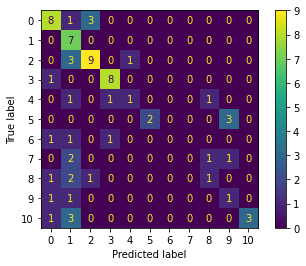

In [146]:
#SVM Algorithm
from sklearn.svm import SVC,SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
SVM_pred = svclassifier.predict(X_test)
print("Train Accuracy :: ", accuracy_score(Y_train,svclassifier.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, SVM_pred))
cm1=confusion_matrix(Y_test, SVM_pred)
print(confusion_matrix(Y_test, SVM_pred))
print(classification_report(Y_test, SVM_pred))
SVC(random_state=0)
plot_confusion_matrix(svclassifier, X_test, Y_test)  # doctest: +SKIP
plt.show()

**K-FOLD**

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, Y, cv=10) #CV means K
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.52777778 0.41666667 0.61111111 0.58333333 0.44444444 0.44444444
 0.38888889 0.5        0.58333333 0.51428571]
Accuracy: 0.50 (+/- 0.15)


In [148]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, Y, cv=5) #CV means K
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.43055556 0.55555556 0.45833333 0.44444444 0.53521127]
Accuracy: 0.48 (+/- 0.10)


**JACKKNIFE for SVM**

In [120]:
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loocv = model_selection.LeaveOneOut()
clf = svm.SVC(kernel='linear', C=1)
results_loocv = model_selection.cross_val_score(clf, X, Y, cv=loocv)
#print(results_loocv)
results_loocv.shape
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 50.97%


**Random Forest Algorithm**

Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)
Train Accuracy ::  0.6384976525821596
Test Accuracy  ::  0.4205607476635514
[[ 3  1  3  2  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0  1  0 10  0  0]
 [ 0  2  1  1  0  0  0  0  3  2  0]
 [ 0  0  2 18  0  0  0  0  3  0  0]
 [ 0  0  0  2  5  0  0  0  3  0  0]
 [ 0  0  0  2  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  3  0  0]
 [ 1  0  1  0  0  0  0  2  4  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0]
 [ 0  1  4  0  0  0  0  0  4  1  0]
 [ 1 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


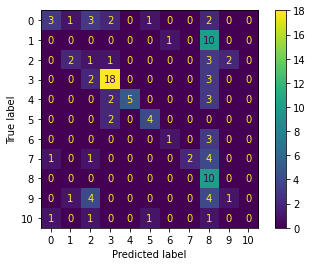

In [ ]:
#Random Forest Algorithm
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=47)
model=clf.fit(X_train, Y_train)
print("Trained model :: ",model)
predictions =model.predict(X_test)
print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, predictions))
cm1=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
plot_confusion_matrix(clf, X_test, Y_test)  # doctest: +SKIP
plt.show()

**K-FOLD**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =ensemble.forest.RandomForestClassifier()
scores = cross_val_score(clf, X, Y, cv=10) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.77777778 0.75925926 0.77777778 0.8490566  0.75471698 0.77358491
 0.86792453 0.81132075 0.8490566  0.88679245]
Accuracy: 0.81 (+/- 0.09)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =ensemble.forest.RandomForestClassifier()
scores = cross_val_score(clf, X, Y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.77570093 0.79439252 0.74766355 0.78301887 0.77358491]
Accuracy: 0.77 (+/- 0.03)


**JACKKNIFE for RFA**

In [123]:
from sklearn import ensemble
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loocv = model_selection.LeaveOneOut()
clf =ensemble.RandomForestClassifier()
results_loocv = model_selection.cross_val_score(clf, X, Y, cv=loocv)
#print(results_loocv)
results_loocv.shape
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 44.01%


**Ada-Boost Algorithm**

Trained model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)
Train Accuracy ::  0.1619718309859155
Test Accuracy  ::  0.11214953271028037
[[ 1  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [15  0  0  3  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0]
 [ 2  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0]]
              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       1.00      0.13      0.23        23
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


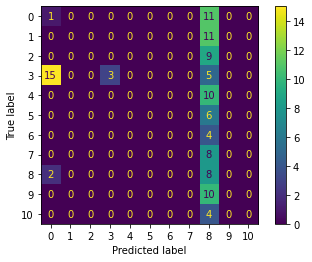

In [ ]:
#Ada-Boost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Model=clf.fit(X_train,Y_train)  
print("Trained model :: ",Model)
Ada_pred =Model.predict(X_test)
print("Train Accuracy :: ", accuracy_score(Y_train,Model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Ada_pred))
cm1=confusion_matrix(Y_test, Ada_pred)
print(confusion_matrix(Y_test, Ada_pred))
print(classification_report(Y_test, Ada_pred))
plot_confusion_matrix(clf, X_test, Y_test)  # doctest: +SKIP
plt.show()

**K-FOLD**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =  ensemble.AdaBoostClassifier()
scores = cross_val_score(clf, X, Y, cv=10) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.27777778 0.2962963  0.24074074 0.26415094 0.1509434  0.28301887
 0.30188679 0.26415094 0.32075472 0.1509434 ]
Accuracy: 0.26 (+/- 0.11)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =  ensemble.AdaBoostClassifier()
scores = cross_val_score(clf, X, Y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.29906542 0.28037383 0.14953271 0.31132075 0.27358491]
Accuracy: 0.26 (+/- 0.12)


**JACKKNIFE for ABA**

In [124]:
from sklearn import ensemble
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loocv = model_selection.LeaveOneOut()
clf =  ensemble.AdaBoostClassifier()
results_loocv = model_selection.cross_val_score(clf, X, Y, cv=loocv)
#print(results_loocv)
results_loocv.shape
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 28.41%
